<center><h2> CPE 4040: Homework 4</h2></center>

1. Write your answer in the cell provided under each question.
2. __You must write comments to explain your thoughts and earn full credit__.
3. __Show your execution result__.
4. Do your own work. __Do not copy-and-paste other people's (or Generative AI's) codes.__
5. <font color=blue> You can find Matplotlib code snippets in the accompanying Jupyter Notebook file to help you make time-domain and frequency-domain plots.  

### Submission:
 * __Submit this notebook file and the pdf version__ - remember to add your name in the filename.

In [1956]:
import pandas as pd
import numpy as np

from numpy.fft import fft, ifft

In [1957]:
import matplotlib.pyplot as plt

## Q1: Signal Processing: Square Wave and Random Noise (60 Points)

__A communication system is commonly modelled by the transmitted signal, the channel, and the receiver.__ 

__Let's consider a simple system where the signal is a `square wave` and the the channel adds `white Gaussian noise` to the signal. Therefore, the received signal is represented by__

__$$r(t) = s(t) + n(t)$$ where $s(t)$ = square wave, $n(t)$ = Gaussian noise.__

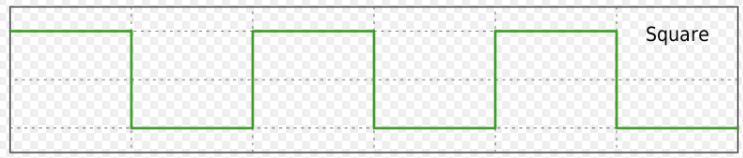

### 1. (8 Points) Generate a periodic square wave by taking a `sign function` on the sine wave, that is,

$$
s(t) = 
\begin{cases} 
1 & \text{if } \sin(2\pi ft) \ge 0 \\
-1 & \text{if } \sin(2\pi ft) < 0
\end{cases}
$$

* Plot a 10-second __square wave__ with amplitude 1, $f$ = 4Hz and sampling rate $f_s$ = 100Hz. Use Matplotlib to plot the signal. You should have a total of 1000 samples. 

* Properly label the x-axis ("Time"), and y-axis ("Amplitude").


In [1958]:
def generate_sine_wave(freq: int, sample_rate:int, duration: int) -> np.ndarray | np.ndarray:

    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    y = np.sin((2 * np.pi) * freq * t)
    
    return t, y

### <font color= green> Generate the square wave

In [1959]:
def sign_function(s):
    if s >= 0:
        return 1
    if s < 0:
        return -1

def square_wave(freq: int, sample_rate:int, duration: int)  -> np.ndarray | np.ndarray:
    t, y = generate_sine_wave(freq, sample_rate, duration)

    y = np.array([sign_function(x) for x in y])

    return t, y
    

freq = 4#Hz
sampling = 100#Hz
duration = 10#s

t, y = square_wave(freq, sampling, duration)

### <font color= green> Plot the square wave

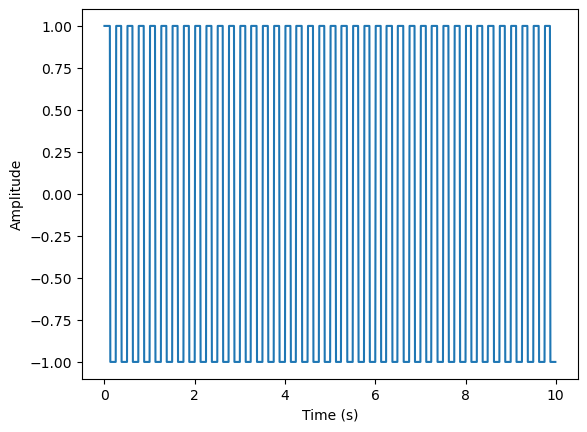

In [1960]:
fig, ax = plt.subplots()
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.plot(t, y)
plt.show()

### 2. (6 Points) Frequency domain representation of the square wave. 

Apply the `calculate_fft( )` function below and use Matplotlib to plot the Fourier Transform result for `frequency range from 0 to 50 Hz`.

In [1961]:
def calculate_fft(signal,fs):
    N = len(signal)
    n = np.arange(N)
    freqs = n*fs/N               # the frequency bins
    mag_fft = abs(fft(signal)/N)   # calculate the magnitude of fft
    return freqs, mag_fft

### <font color= green> Calculate the FFT

In [1962]:
freqs, mag_fft = calculate_fft(y, sampling)

### <font color= green> Plot FFT of the square wave for frequency range 0 to 50Hz

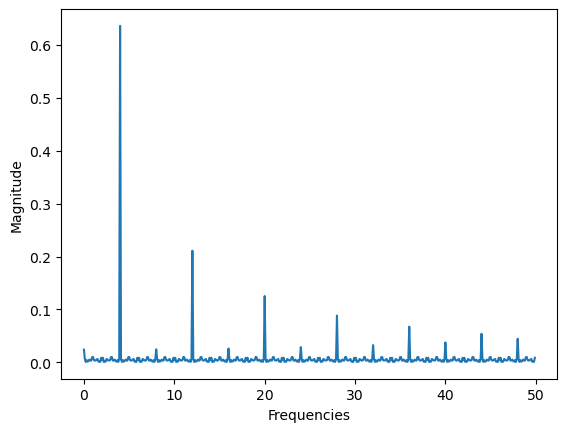

In [1963]:
mask = freqs < 50

filtered_mags = mag_fft[mask]
filtered_freqs = freqs[mask]

fig, ax = plt.subplots()
ax.set_xlabel("Frequencies")
ax.set_ylabel("Magnitude")
ax.plot(filtered_freqs, filtered_mags)
plt.show()


### 3. (10 Points) Find Peak Frequency Components 

You can see a few distinct peaks in the FFT from Step 2. Write a code to identify the frequencies of the top five peaks in the FFT plot, `for frequency range from 0 to 50 Hz`.

Please list the frequencies and their corresponding magnitudes.

[36. 28. 20. 12.  4.]


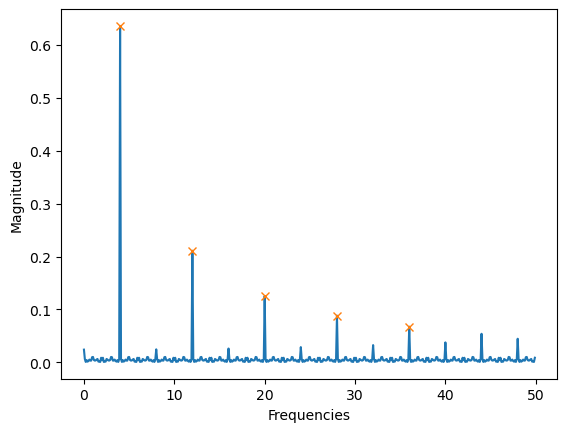

In [1964]:
from scipy.signal import find_peaks



peaks, _ = find_peaks(filtered_mags)

peak_mags = filtered_mags[peaks]
top_5_mags = peaks[np.argsort(peak_mags)[-5:]]

print(filtered_freqs[top_5_mags])

fig, ax = plt.subplots()
ax.set_xlabel("Frequencies")
ax.set_ylabel("Magnitude")
ax.plot(filtered_freqs, filtered_mags)
ax.plot(filtered_freqs[top_5_mags], filtered_mags[top_5_mags], "x")
plt.show()


### 4. (5 Points) Generate an array of Gausian noise with mean = 0 and standard deviation = 0.5

Use `np.random.normal` to generate the noise array. The size of the noise array should also be 1000.

Add the square wave array from 1 and the noise array together. Plot the resulting array.

### <font color= green> Generate the Gaussian noise and the noisy signal

In [1965]:
def square_with_noise(freq: int, sample_rate:int, duration: int) -> np.ndarray | np.ndarray:
    t, y = square_wave(freq, sample_rate, duration)
    noise = np.random.normal(0, 0.5, t.size)
    y = np.add(y, noise)

    return t, y

freq = 4#Hz
sampling = 100#Hz
duration = 10#s

t, y_noise = square_with_noise(freq, sampling, duration)

### <font color= green> Plot the noisy signal

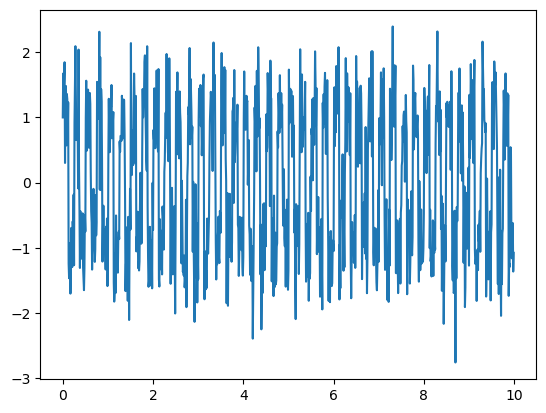

In [1966]:
fig, ax = plt.subplots()
ax.plot(t, y_noise)
plt.show()

### 5. (6 Points) Signal-to-noise ratio (SNR) is an important quality indicator of the communication channel.

     SNR(dB) = 10log10(P_s/P_n), where P_s is the average signal power and P_n is the average noise power.

Please calculate the SNR(dB) of this case. The average power of a sequence of signals = $\sum_{i=1}^N s^2/N$, where $N$ is the number of samples.

In [1967]:

def P_n(signal: np.ndarray) -> float:
    square = np.multiply(signal, signal)
    return np.average(square)

def snr (signal: np.ndarray) -> np.ndarray:
    pn = P_n(signal)
    ratio = signal / pn
    return 10 * np.log10(ratio)

snr(y_noise)

C:\Users\rbrin\AppData\Local\Temp\ipykernel_35876\2945329666.py:8: RuntimeWarning: invalid value encountered in log10
  return 10 * np.log10(ratio)


array([-9.86826686e-01,  1.25461371e+00,  4.09354932e-01,  9.93391567e-01,
        1.68002916e+00, -6.20584656e+00,  4.52931715e-01,  7.24576773e-01,
       -3.43107490e+00,  3.51228138e-01,  9.72446916e-02, -2.44878741e+00,
       -8.25944928e-02,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan, -1.39396272e+00,  6.51182686e-01,
        2.22415881e+00,  5.45221117e-01, -2.84271340e+00, -1.22042094e+00,
       -2.18802204e+00, -1.43767951e+00,             nan,  2.11464731e+00,
       -7.36223466e+00,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan, -1.04192496e+00,
        9.55645305e-01, -

### 6. (10 Points) Implement a moving-average low-pass filter. 

A moving-average filter is a simple yet effective digital low-pass filter that reduces random noises in the signal. It is characterized by its filter length $L$, specifying how many of the last points of the signal will be averaged to produce the next point in the output.

$$y[n] = \frac{1}{L}\sum_{i=0}^{L-1}x[n-i] $$
where $x[n]$ is the noisy signal, $L$ is the length of the filter, and $y[n]$ is the filtered signal.

* Write a Python function `moving_average_filter` that implements this low-pass filter. The function should accept two parameters: `noisy_signal` and `L`. It should return the filtered signal array. For this exercise, set $L=7$ for the length of the filter.

* Visualization: Plot the noisy signal and the filtered signal in the same figure.

* Please make a comment to compare the signals before and after the filtering. 

### <font color= green> Define the function for moving-average filter and calculate the filter output

In [1968]:
def moving_average_filter(noisy_signal: np.ndarray, L: int = 7) -> np.ndarray:
    filtered_signal = np.zeros(len(noisy_signal) - L + 1)
    for n in range(L - 1, len(y_noise)):
        filtered_signal[n - L + 1] = np.sum(noisy_signal[n - L + 1: n + 1]) / L

    return filtered_signal

low_pass = moving_average_filter(y_noise)

### <font color= green> Plot the noisy signal and the filtered signal

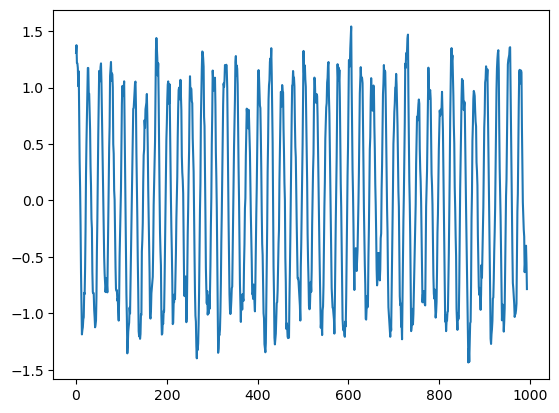

In [1969]:
fig, ax = plt.subplots()
ax.plot(low_pass)
plt.show()

### <font color=green> Compare the signals before and after the filtering.

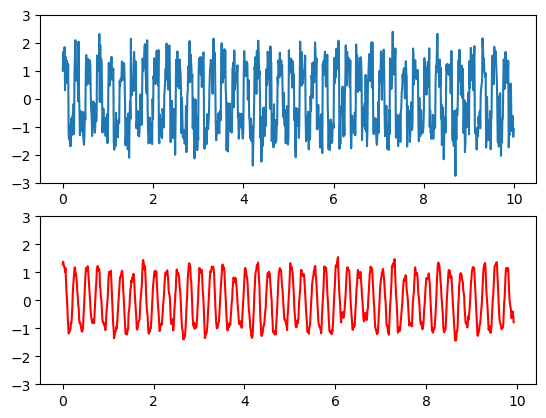

In [1970]:
plt.subplot(2, 1, 1)
plt.plot(t, y_noise)
plt.ylim(-3, 3)

plt.subplot(2, 1, 2)
plt.plot(t[0:994], low_pass, 'r')
plt.ylim(-3, 3)
plt.show()

### 7. (8 Points) Frequency Domain view of the noisy signal and the filtered signal¶

Use FFT to transform both the noisy signal and the filtered signal to the frequency domain.

Visualization: Plot the noisy signal and the filtered signal in the same figure for comparison.You only need to plot in the frequency range between 0 to 5Hz.

Please make an observation on:
* The noise levels before and after moving-average filtering
* The peak frequency components: what happened there?

### <font color=green> Calculate the FFTs

In [1971]:
freq_original, mag_original = calculate_fft(y_noise, sampling)
freq_low_pass, mag_low_pass = calculate_fft(low_pass, sampling)

### <font color= green> Plot FFTs for both the noisy signal and the filtered signal, for frequency range from 0 to 50Hz

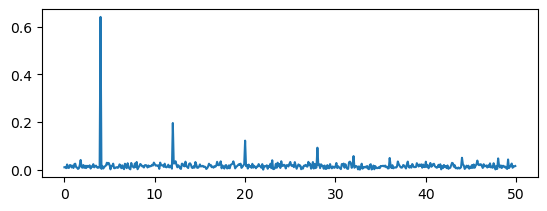

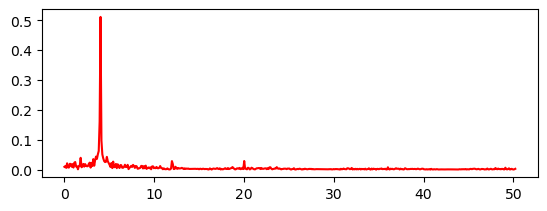

In [1972]:
mask = freqs < 50

filtered_mags_original = mag_original[mask]
filtered_freqs_original = freq_original[mask]

mask_low = freqs[:994] < 50

filtered_mags_low = mag_low_pass[mask_low]
filtered_freqs_low = freq_low_pass[mask_low]

plt.subplot(2,1,1)
plt.plot(filtered_freqs_original, filtered_mags_original)
plt.show()

plt.subplot(2,1,2)
plt.plot(filtered_freqs_low, filtered_mags_low, 'r')
plt.show()

### <font color=green> Your observations

It appears that the low-pass filter worked. There is only one major peak and it is in the lower frequency range.

### 8. (7 Points) Frequency domain representation of the moving-average filter¶

To gain an insight on how the signal and the noise are shaped by the moving-average filter in the frequency domain, you will calculate the FFT of the filter (we call it the `frequency response`).

Recall in Step 6, the $L$-tap moving-average filter is represented by 
$$ h = \big[ \frac{1}{L}, \frac{1}{L}, \frac{1}{L}, \cdots, \frac{1}{L} \big] $$

* Apply FFT on the filter, $h$, and plot the result for frequency range from 0 to 50Hz. Assume $L=7$. 

* Please make a comment on the shape of the frequency response and explain how it affects the noise and signal in Step 7.

### <font color=green> Calculate the FFT of the 7-tap moving-average filter

In [1973]:
L = 7
h = np.ones(L) / L  


freqs_h, mag_fft_h = calculate_fft(h, sampling)

### <font color= green> Plot FFT of the 7-tap moving-average filter

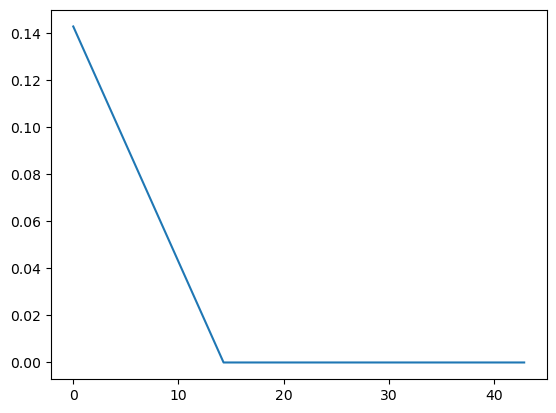

In [1974]:
mask = freqs_h < 50

freqs_h_50 = freqs_h[mask]
mag_fft_h_50 = mag_fft_h[mask]

plt.plot(freqs_h_50, mag_fft_h_50)
plt.show()

### <font color=green> Make a comment on the shape of the frequency response and explain how it affects the noise and signal in Step 7

The low-pass filter only lets low frequency signals through. This is what the line is showing, there are only non-zero values for frequencies under 15Hz.

<h2>Q2: DataFrame indexing and slicing (20 Points)</h2>

<h3>1. Create a DataFrame with the same row indices, column labels, and data as the table below.</h3>

In [1975]:
data = {
    'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
    'age': [2.5, 3.0, 0.5, np.nan, 5.0, 2.0, 4.5, np.nan, 7.0, 3.0],
    'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
    'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']
}

index_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

vet = pd.DataFrame(data, index=index_labels)

vet

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


<h3>2. Select only the 'animal' and 'visits' columns from the DataFrame and show the result.</h3>

In [1976]:
animal_visit = vet[["animal", "visits"]]
animal_visit

,animal,visits
a,cat,1
b,cat,3
c,snake,2
d,dog,3
e,dog,2
f,cat,3
g,snake,1
h,cat,1
i,dog,2
j,dog,1


<h3>3. Select the data in rows 'c', 'f', and 'g' and in columns 'animal' and 'age'. Show the result.</h3>

In [1977]:
animal_age = vet[["animal", "age"]]
animal_age_rows = animal_age.loc[['c', 'f', 'g']]
animal_age_rows

,animal,age
c,snake,0.5
f,cat,2.0
g,snake,4.5


<h3>4. Select the rows where the animal is a dog and the age is less than 5.</h3>

In [1978]:
young_dog = vet[(vet['animal'] == 'dog') & (vet['age'] < 5)]
young_dog

,animal,age,visits,priority
j,dog,3.0,1,no


<h3>5. In the 'animal' column, change the 'snake' entries to 'python'</h3>

In [1979]:
vet['animal'] = vet['animal'].replace('snake', 'python')
vet

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,python,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,python,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


<h3>6. Select the rows where the age is missing, i.e. age value is NaN.</h3>

In [1980]:
rows_with_nan_age = vet[vet['age'].isna()]
rows_with_nan_age

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


<h3>7. We want to clean up the NaN by replacing it with the average age of the dogs (or cats).</h3>
<h3>First, please find out the average age of the dogs and the average age of the cats.</h3>

In [1981]:
avg_dog_age = vet[vet['animal'] == 'dog']['age'].mean() 
avg_cat_age = vet[vet['animal'] == 'cat']['age'].mean()


<h3>8. Replace the NaNs with the average ages and show the resulting DataFrame</h3>

In [1982]:

vet.loc[(vet['animal'] == 'dog') & (vet['age'].isna()), 'age'] = avg_dog_age
vet.loc[(vet['animal'] == 'cat') & (vet['age'].isna()), 'age'] = avg_cat_age
vet

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,python,0.5,2,no
d,dog,5.0,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,python,4.5,1,no
h,cat,2.5,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


<h2>Q3: DataFrame Arithmetics (20 Points)</h2>
    
<h3> 1. Generate a DataFrame that has 10 rows and 8 columns of random numbers (use np.random.rand). </h3>
<h3>Label the columns A, B, C, D, E, F, G and H.</h3>

In [1983]:
random_df = pd.DataFrame(np.random.rand(10, 8), columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
random_df

,A,B,C,D,E,F,G,H
0,0.341590,0.286880,0.454877,0.002134,0.801347,0.214395,0.476336,0.672425
1,0.514033,0.913722,0.774748,0.661988,0.874113,0.680487,0.523161,0.534085
2,0.774247,0.618925,0.060184,0.188947,0.813340,0.074615,0.841043,0.296226
3,0.415018,0.607462,0.629101,0.593177,0.762782,0.611391,0.097456,0.614747
4,0.393269,0.903852,0.600840,0.546946,0.051540,0.862807,0.319565,0.039874
5,0.770410,0.086694,0.673915,0.900129,0.938677,0.974528,0.967040,0.037097
6,0.896251,0.963545,0.379707,0.320686,0.553815,0.969362,0.655121,0.419900
7,0.448668,0.730125,0.638986,0.131164,0.582692,0.155190,0.711499,0.302900
8,0.529794,0.778511,0.404318,0.080371,0.648186,0.387732,0.296235,0.084939
9,0.772952,0.045857,0.699523,0.160021,0.721055,0.111040,0.343675,0.989029


<h3>2. Calculate the sum of numbers for each column. Display the result.</h3>

In [1984]:
column_sums = random_df.sum()
column_sums

A    5.856233
B    5.935572
C    5.316199
D    3.585563
E    6.747548
F    5.041548
G    5.231131
H    3.991220
dtype: float64

<h3>3. Which column has the smallest sum? Please answer with the column label.</h3>

In [1985]:
col_min = column_sums.idxmin()
print("Column with the smallest sum:", col_min)

Column with the smallest sum: D


<h3>4. Calculate the mean value for each row, then subtract the mean from each element in the row.</h3>

In [1986]:
row_means = random_df.mean(axis=1)

df_centered = random_df.sub(row_means, axis=0)

df_centered


,A,B,C,D,E,F,G,H
0,-0.064658,-0.119368,0.048629,-0.404114,0.395099,-0.191853,0.070088,0.266177
1,-0.170509,0.229180,0.090206,-0.022554,0.189571,-0.004055,-0.161381,-0.150457
2,0.315806,0.160484,-0.398257,-0.269494,0.354900,-0.383826,0.382602,-0.162215
3,-0.126373,0.066070,0.087709,0.051786,0.221391,0.069999,-0.443936,0.073355
4,-0.071568,0.439015,0.136003,0.082110,-0.413296,0.397970,-0.145272,-0.424962
5,0.101849,-0.581868,0.005353,0.231568,0.270116,0.305967,0.298479,-0.631465
6,0.251453,0.318747,-0.265091,-0.324113,-0.090984,0.324563,0.010323,-0.224898
7,-0.013985,0.267472,0.176333,-0.331489,0.120039,-0.307463,0.248846,-0.159753
8,0.128533,0.377250,0.003058,-0.320890,0.246925,-0.013528,-0.105026,-0.316322
9,0.292558,-0.434537,0.219129,-0.320373,0.240661,-0.369354,-0.136719,0.508635


<h3>5. Add an additional row with the mean value of each column. Label this new row "Average".</h3>

In [1987]:
# Calculate the mean value for each column
column_means = random_df.mean()

# Append the column means as a new row labeled "Average"
random_df.loc['Average'] = column_means

random_df


,A,B,C,D,E,F,G,H
0,0.341590,0.286880,0.454877,0.002134,0.801347,0.214395,0.476336,0.672425
1,0.514033,0.913722,0.774748,0.661988,0.874113,0.680487,0.523161,0.534085
2,0.774247,0.618925,0.060184,0.188947,0.813340,0.074615,0.841043,0.296226
3,0.415018,0.607462,0.629101,0.593177,0.762782,0.611391,0.097456,0.614747
4,0.393269,0.903852,0.600840,0.546946,0.051540,0.862807,0.319565,0.039874
5,0.770410,0.086694,0.673915,0.900129,0.938677,0.974528,0.967040,0.037097
6,0.896251,0.963545,0.379707,0.320686,0.553815,0.969362,0.655121,0.419900
7,0.448668,0.730125,0.638986,0.131164,0.582692,0.155190,0.711499,0.302900
8,0.529794,0.778511,0.404318,0.080371,0.648186,0.387732,0.296235,0.084939
9,0.772952,0.045857,0.699523,0.160021,0.721055,0.111040,0.343675,0.989029
